<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></span></li><li><span><a href="#shap" data-toc-modified-id="shap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>shap</a></span><ul class="toc-item"><li><span><a href="#インストール時の注意点" data-toc-modified-id="インストール時の注意点-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>インストール時の注意点</a></span></li><li><span><a href="#shap-valueの意味" data-toc-modified-id="shap-valueの意味-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>shap valueの意味</a></span></li><li><span><a href="#shap-value-を計算する" data-toc-modified-id="shap-value-を計算する-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>shap value を計算する</a></span></li></ul></li></ul></div>

# 概要
特徴量の重要度を定量的に検証する方法を学習した履歴を記す。

# shap
公式サイトはこちら。
https://github.com/slundberg/shap

## インストール時の注意点
公式サイトで記されているインストール方法は、以下の通りだが、  
```python
conda install -c conda-forge shap 
```
そのままだと、グラフ描画機能が使えない。  
⇒ matplotlibのバージョンが古いため

そこで、shap をインストールした後、matplotlib の upgrade が必要になるだろう。  
```python
conda upgrade matplotlib
```

## shap valueの意味
ある特徴量$feature_i$が与えられている場合と、与えられていない場合で、モデルの性能を比較することで、影響度を表そうとしたもの。  

$$\phi_{i}(p)=\sum_{S \supseteq N/i}\frac{|S|!(n-|S|-1)!}{n!} (p(S \cup i)-p(S))$$  

$\phi_{i}(p)$ は、予測値pが与えらえれた際の、特徴量iのshap value。  
n は全特徴量の種類数。Sは、注目している特徴量。  
$p(S \cup i)$ は、注目している特徴量Sが与えられている時の予測値。  
$p(S)$は、注目している特徴量Sが与えられていない際の予測値である。

平易な解説をしているエントリはこちらである。  
https://medium.com/@gabrieltseng/interpreting-complex-models-with-shap-values-1c187db6ec83




In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

まずはトレーニングする。

In [3]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[683]	valid_0's binary_logloss: 0.277144


## shap value を計算する

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [5]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [6]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

In [14]:
shap_values.shape

(32561, 12)

In [15]:
explainer_valid = shap.TreeExplainer(model)
shap_values_valid = explainer.shap_values(X_test, y_test)

In [16]:
shap.force_plot(explainer_valid.expected_value, shap_values_valid[0,:], X_display.iloc[0,:])

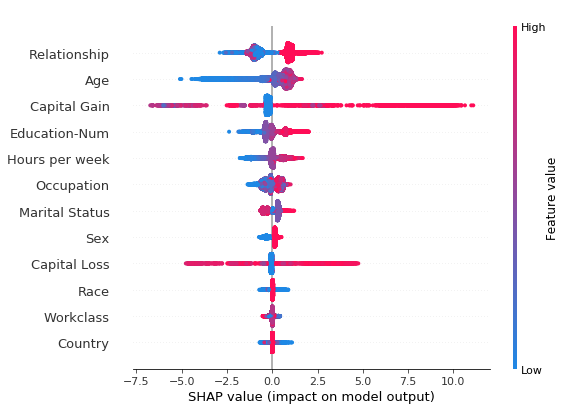

In [7]:
shap.summary_plot(shap_values, X)

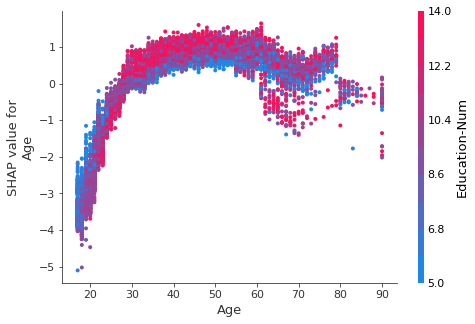

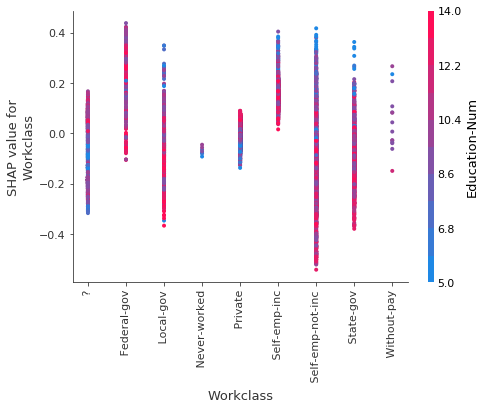

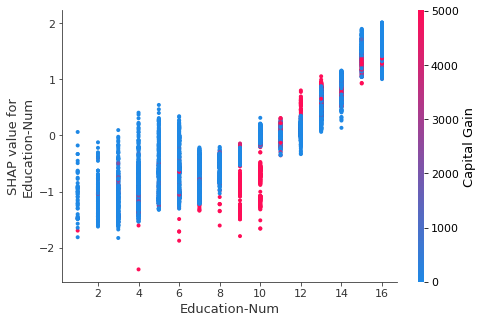

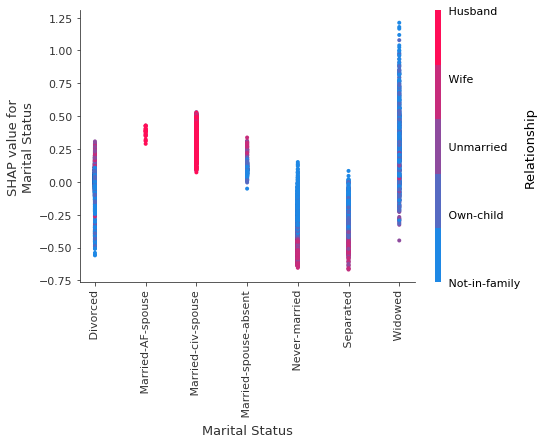

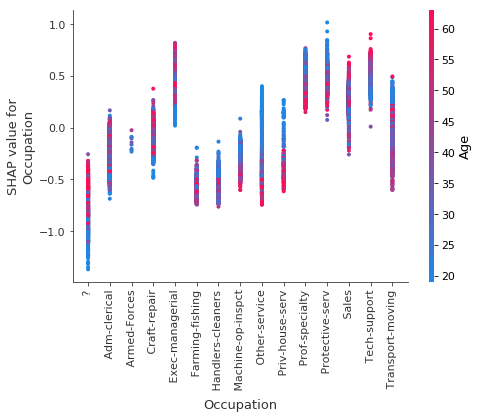

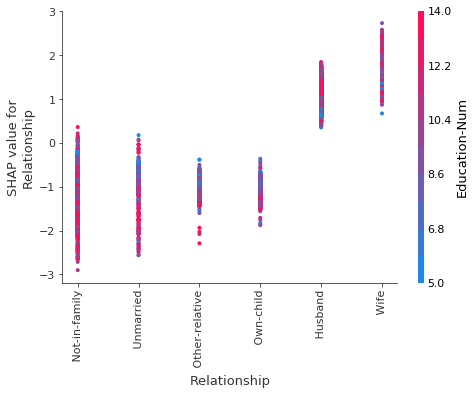

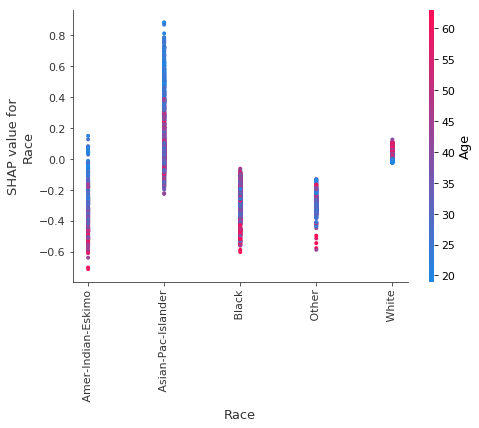

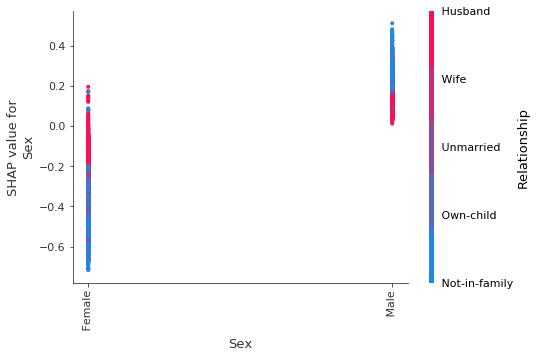

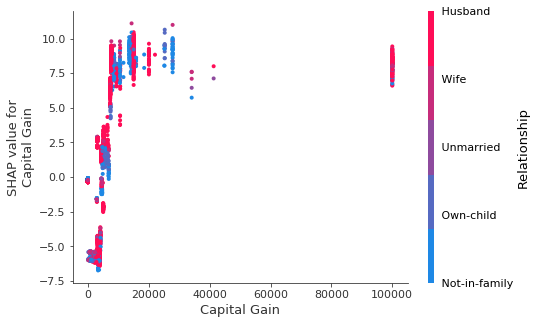

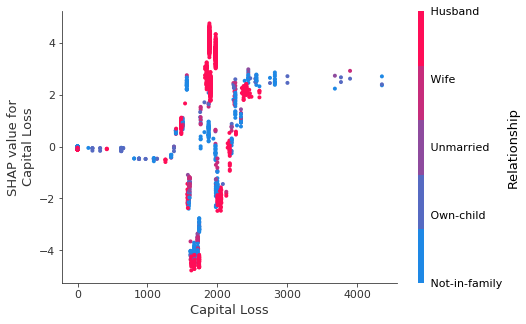

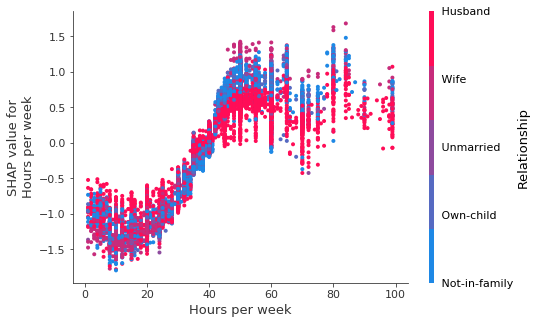

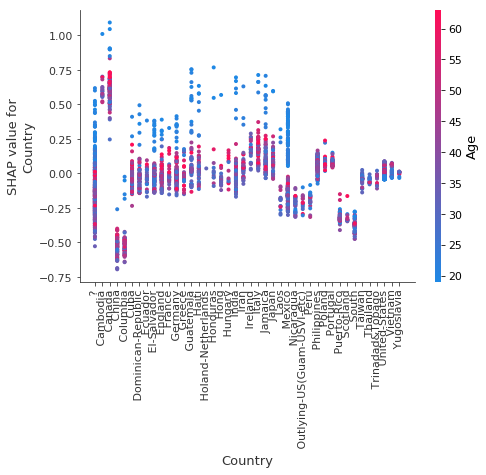

In [8]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

In [20]:
import matplotlib.colors as colors
print(hasattr(colors, "to_rgba"))
import matplotlib

False


In [21]:
matplotlib.__version__

'1.5.3'

In [12]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 2,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model_ind = lgb.train(params, d_train, 20000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.295586
[2000]	valid_0's binary_logloss: 0.28955
[3000]	valid_0's binary_logloss: 0.286801
[4000]	valid_0's binary_logloss: 0.284238
[5000]	valid_0's binary_logloss: 0.282737
[6000]	valid_0's binary_logloss: 0.281547
[7000]	valid_0's binary_logloss: 0.280709
[8000]	valid_0's binary_logloss: 0.280044
[9000]	valid_0's binary_logloss: 0.279496
[10000]	valid_0's binary_logloss: 0.279045
[11000]	valid_0's binary_logloss: 0.278711
[12000]	valid_0's binary_logloss: 0.278414
Early stopping, best iteration is:
[12034]	valid_0's binary_logloss: 0.27839
